Title:
Heart Disease Prediction Using Classification.

Category:
Medical Science

Objective:
To predict if a patient have factors that are risky for heart disease using clinical data by analyzing patient records.

Summary:

Millions of people worldwide are affected by heart disease, a leading cause of mortality. Identifying the most critical risk factors that contribute to heart disease is essential for early detection and prevention. This project evaluates the effectiveness of multiple machine learning algorithms in predicting heart disease based on clinical data.

We implemented five algorithms: Logistic Regression, Random Forest, KNN, AdaBoost, and SVM. The results demonstrated the following:

Random Forest achieved the highest accuracy, with 100% accuracy on both training and test data.
AdaBoost performed strongly with a test accuracy of 86.34%, making it a reliable choice.
SVM achieved a balanced performance with a test accuracy of 82.44%.
Logistic Regression showed moderate accuracy, with 80.48% on the test set.
KNN had the lowest accuracy, with only 72.19% on the test set, likely due to overfitting.
These findings suggest that Random Forest and AdaBoost are the most effective models for heart disease prediction in this dataset.


Dataset Source (URL): https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset



### Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')

# Data Collection and Processing

In [ ]:
# loading the csv data to a pandas DataFrame
heart_df = pd.read_csv('/content/heart.csv')

In [ ]:
# Print first 5 rows of the datset.
heart_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
# Print last 5 rows of the datset.
heart_df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [ ]:
# Number of rows and columns in the datset
heart_df.shape

(1025, 14)

In [ ]:
# Getiing details about the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing value
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# Data Visualization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(heart_df['target'])  # Use the correct column name
heart_df['target'] = encoder.transform(heart_df['target'])


In [ ]:
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

### Correlation plot
This step creates a clustered heatmap to visualize the correlation between the features.

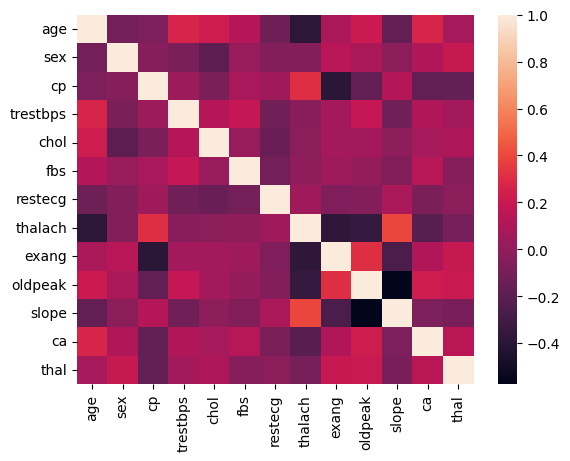

In [ ]:
import seaborn as sns
sns.heatmap(heart_df.drop(columns = 'target').corr());

### KDE Plot
This step creates a pairplot to visualize the distribution of the features.

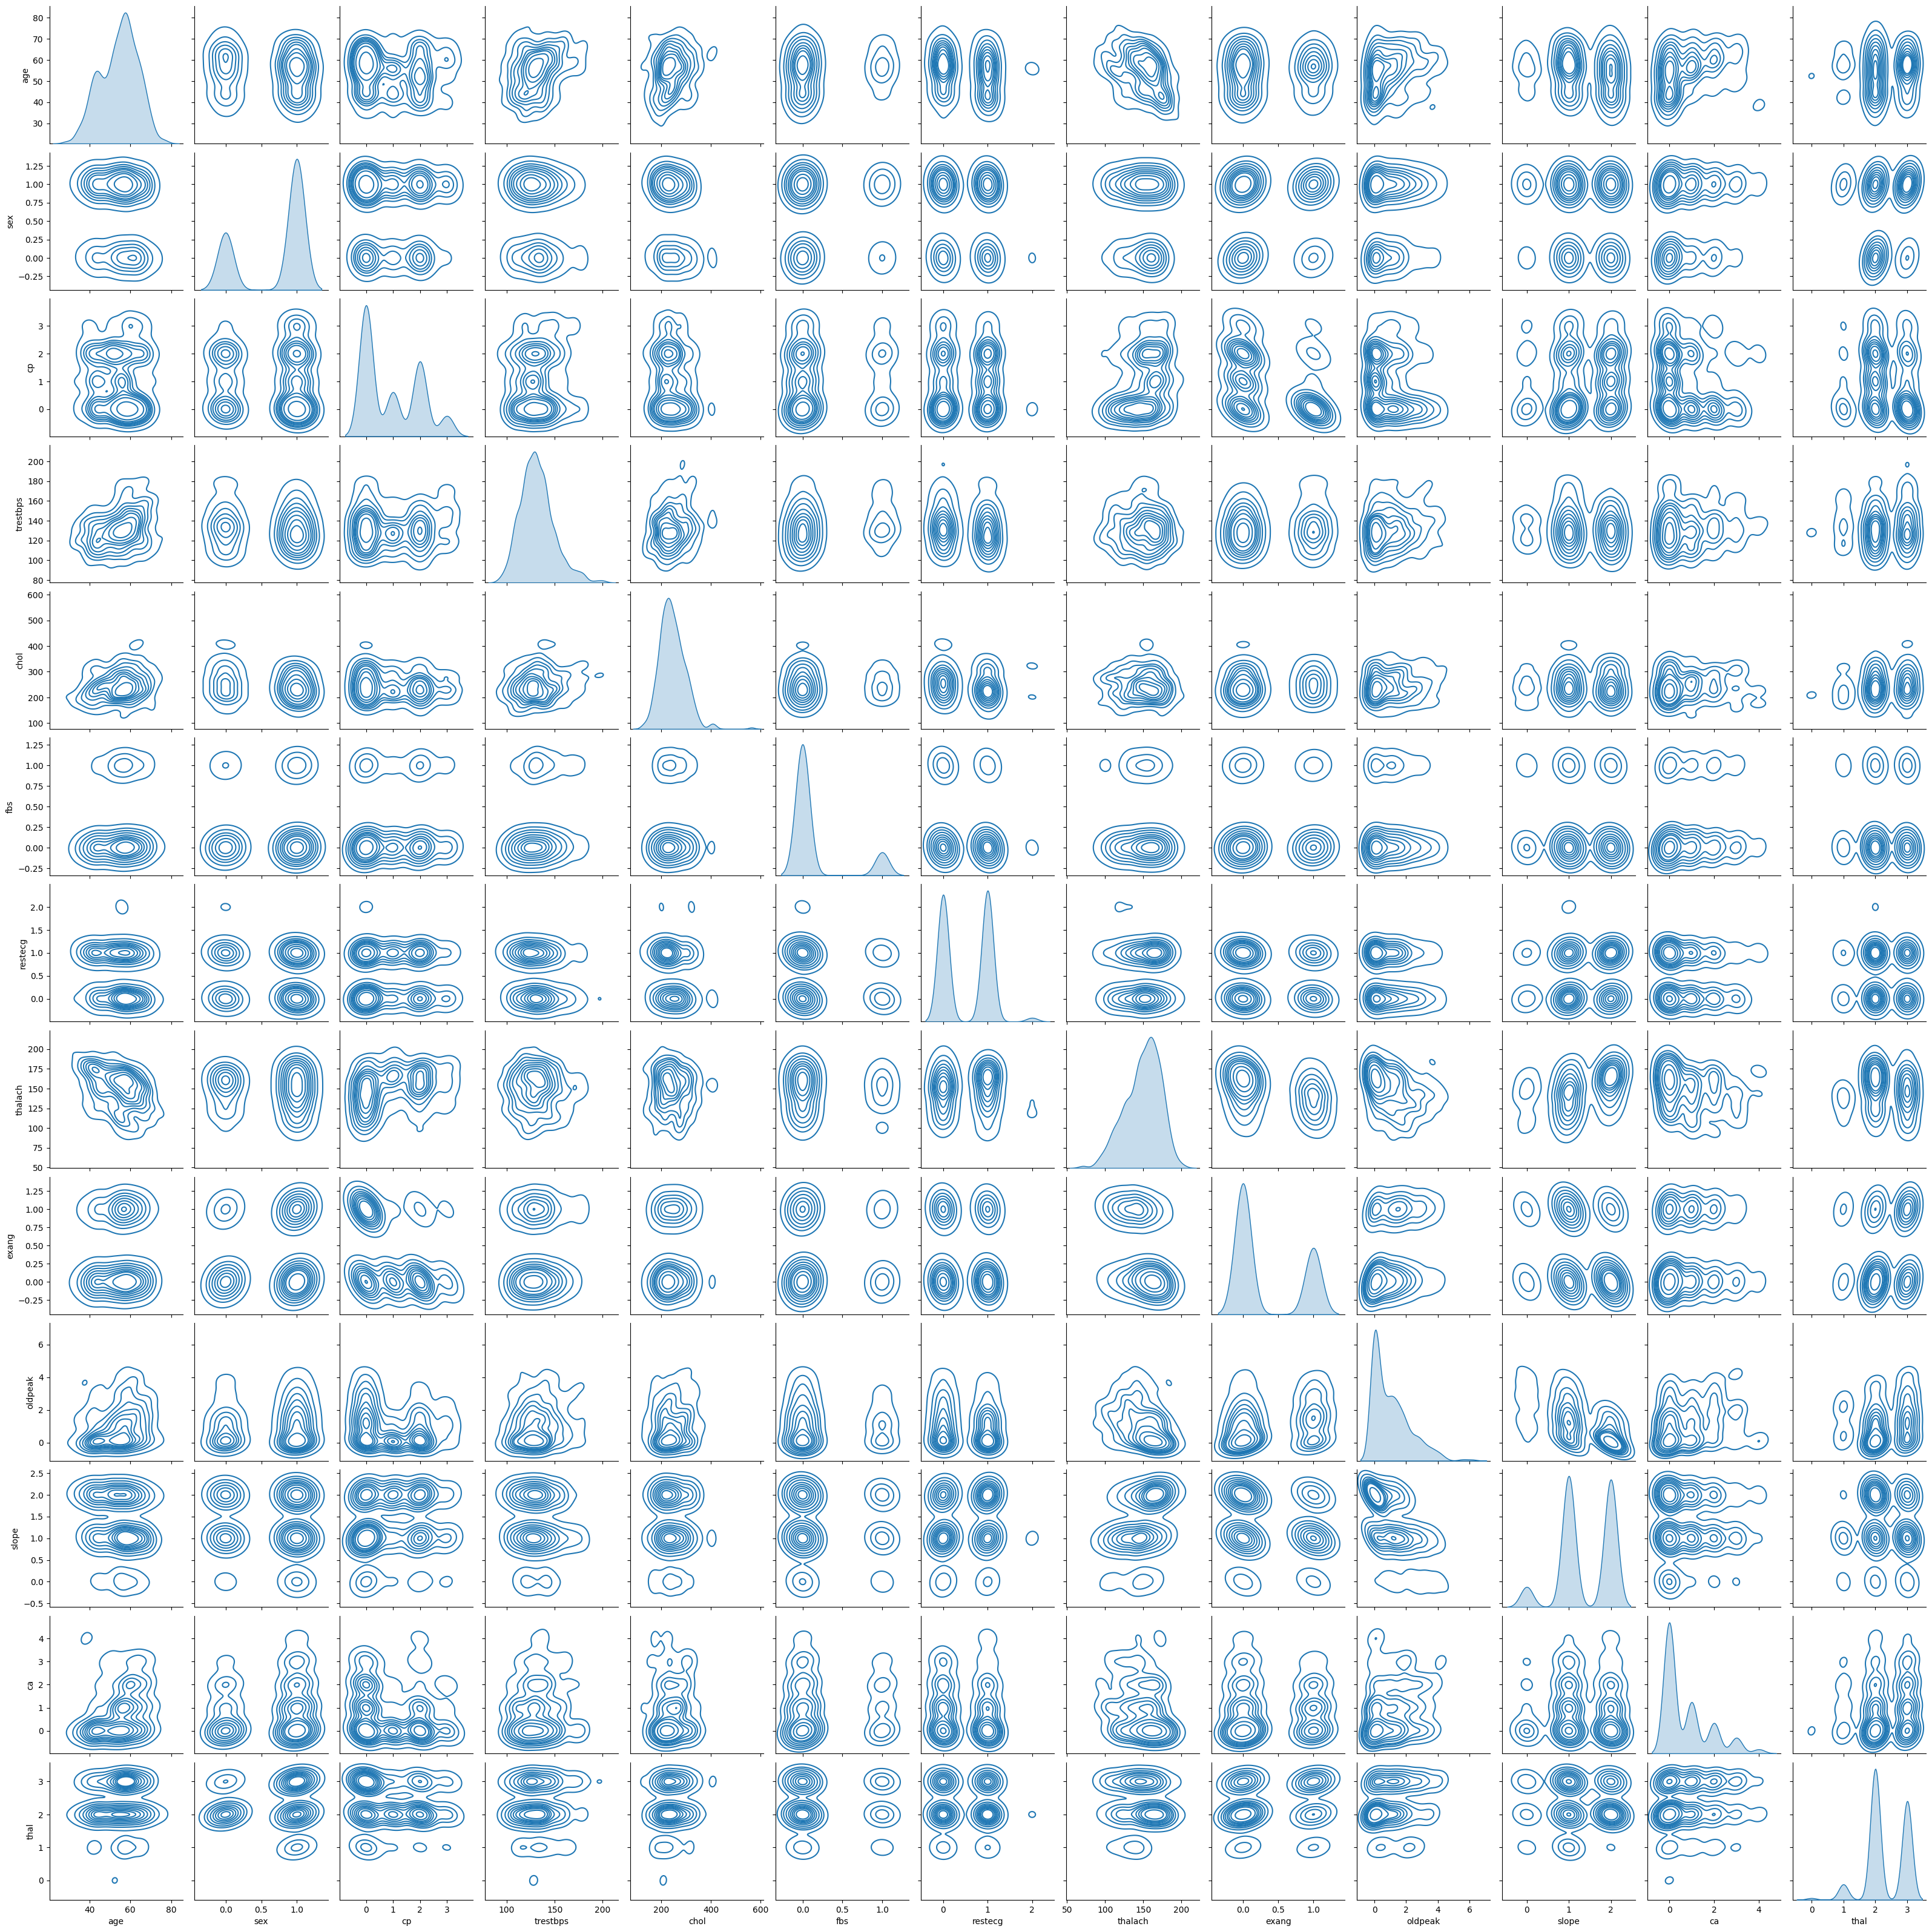

In [ ]:
sns.pairplot(heart_df.drop(columns='target'), kind="kde");

### Line Plot
This step creates a lineplot to visualize the distribution of the features.

<Axes: xlabel='age', ylabel='target'>

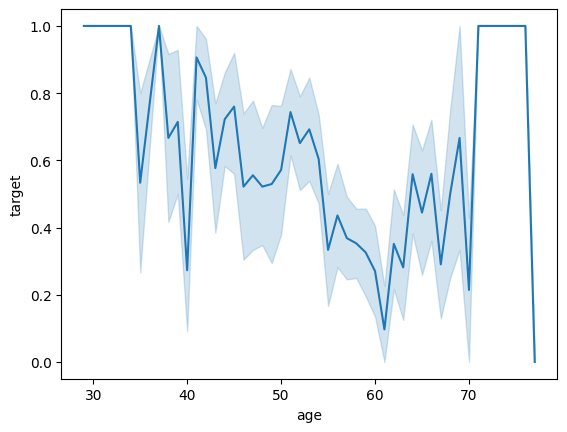

In [ ]:
sns.lineplot(data=heart_df, x='age', y='target')


### Bar Plot
This step creates a barplot to visualize the distribution of the features.
The bar plot will show the count or frequency of each value. The height of the bars will represent the number of occurrences of each category.

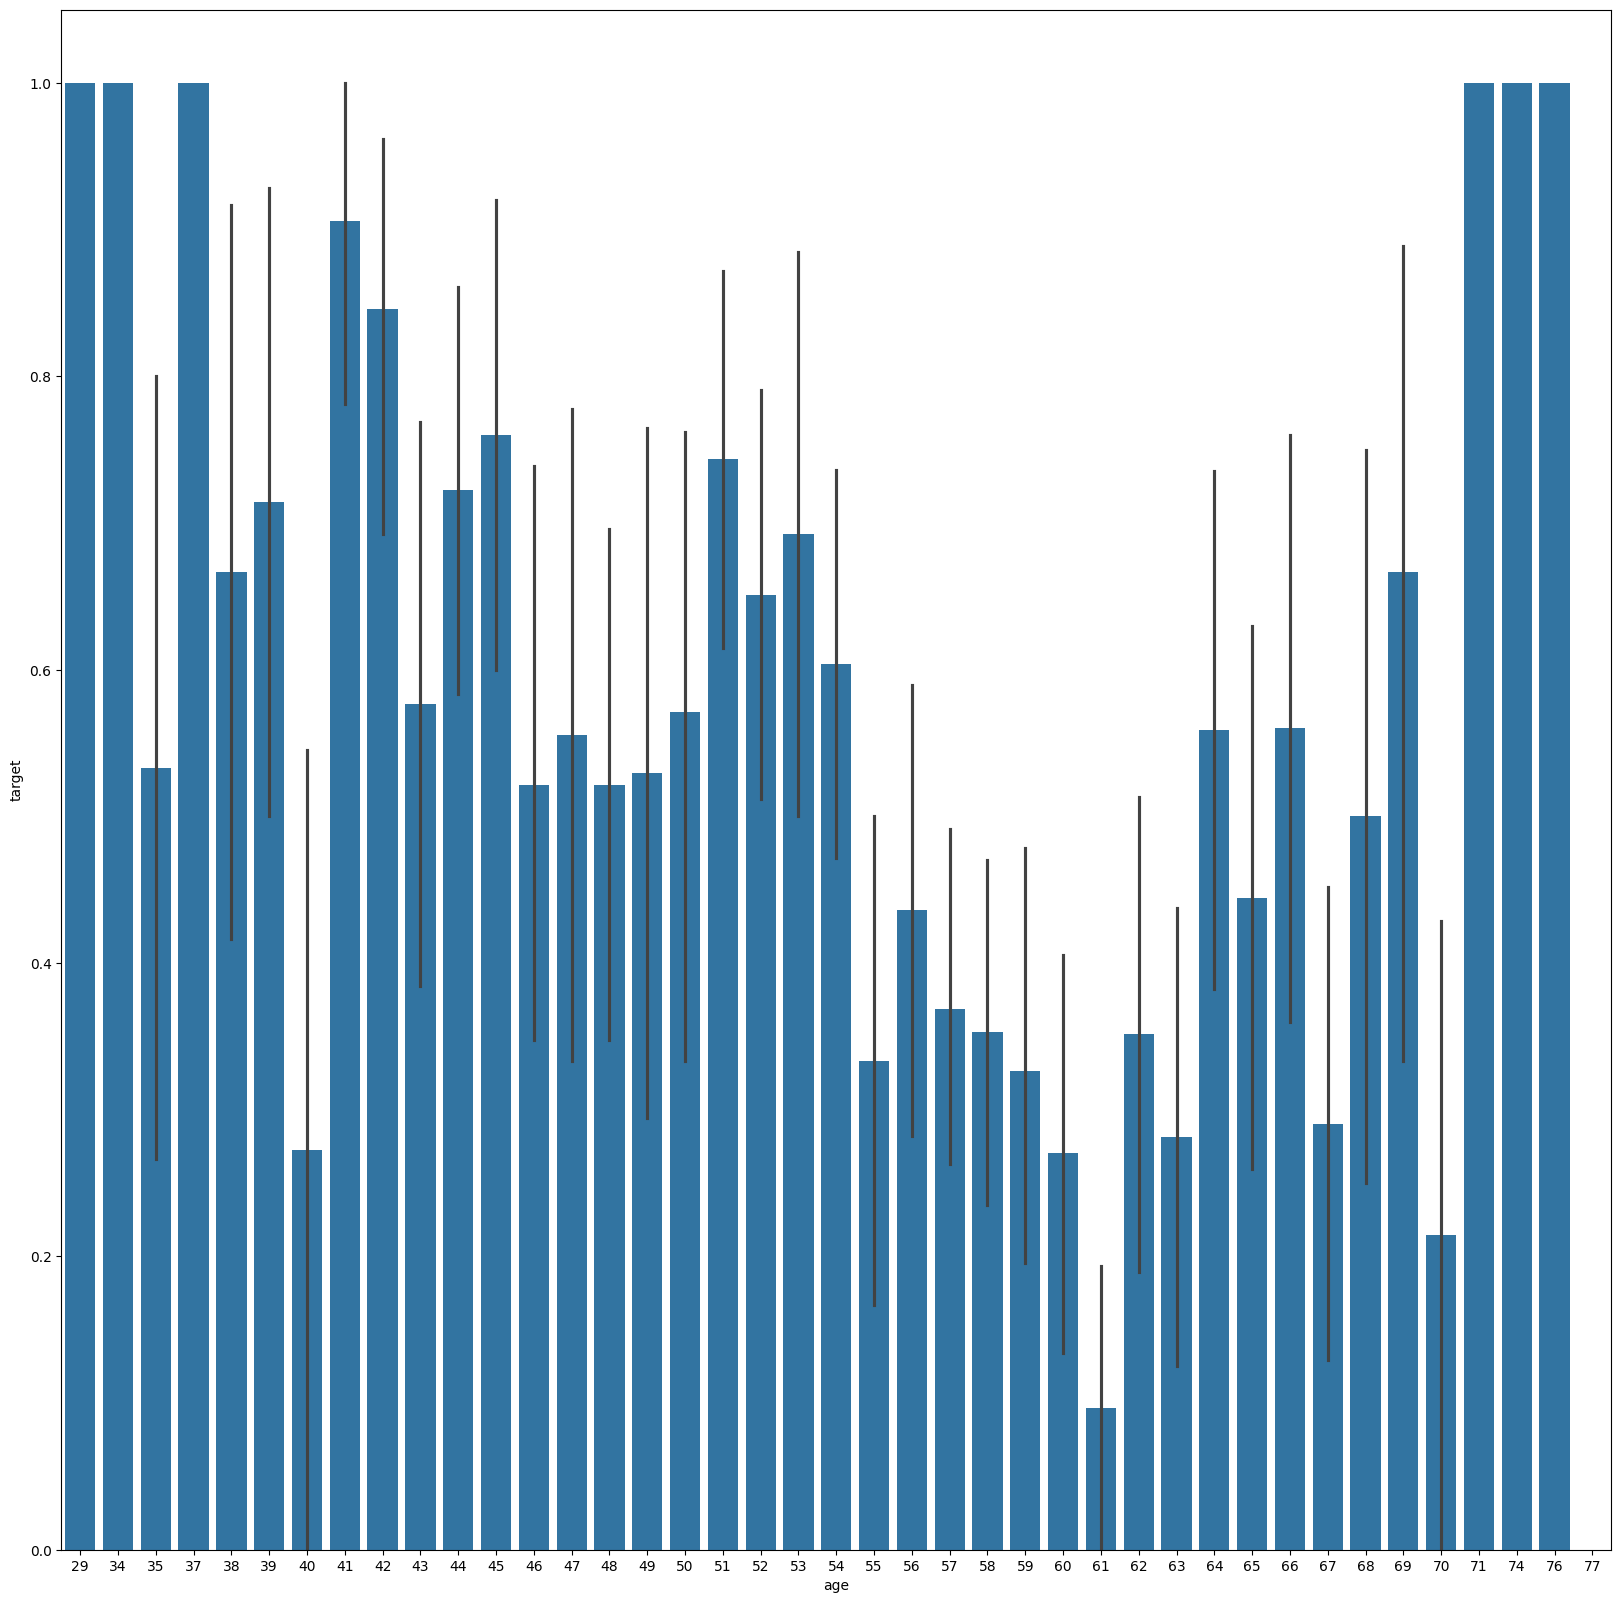

In [ ]:
plt.figure(figsize= ( 20, 20))
sns.barplot(data= heart_df,y='target', x='age');

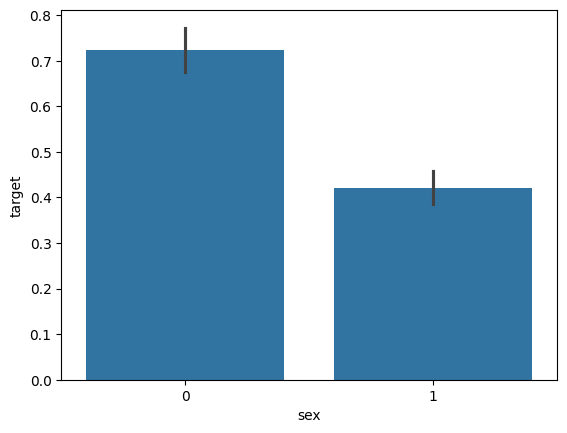

In [ ]:
sns.barplot(data= heart_df, y='target', x='sex');

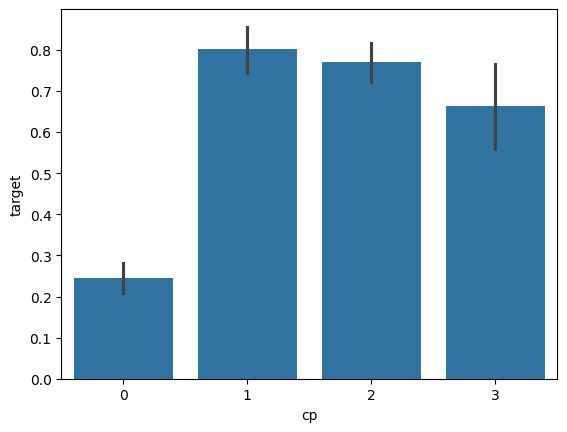

In [ ]:
sns.barplot(data =heart_df, y='target', x='cp');

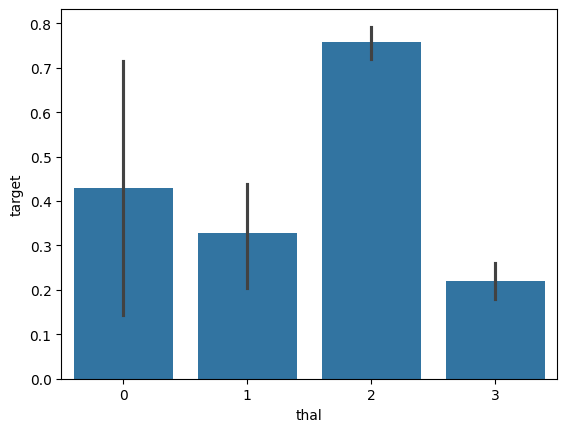

In [ ]:
sns.barplot(data =heart_df, y='target', x='thal');

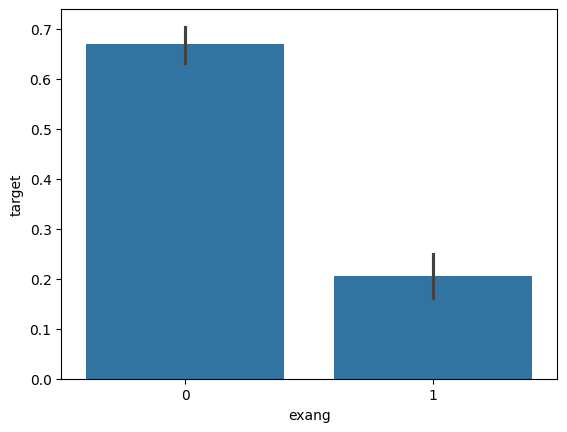

In [ ]:
sns.barplot(data =heart_df, y='target', x='exang');

In [ ]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

##### 1 -->Defective Heart                  
##### 0 -->Healthy Heart

## Splitting the Feauture and Target

In [ ]:
X = heart_df.drop(columns ='target', axis =1)
Y = heart_df['target']

In [ ]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2         0   0     3  
3         2   1     3  
4         1   3     2  
...     ...  ..   ...  
1020      2   0     2  
1021      1   1     3  
1022      1   1     2  
1023      2   0     2  
1024      1   1     3  

[1025 rows x 13 columns]

In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Splitting the Data into Training Data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)

## Data Information
This step displays the shape and information of the training and testing sets.

In [ ]:
X.shape, X_train.shape, X_test.shape

((1025, 13), (820, 13), (205, 13))

In [ ]:
Y.shape, Y_train.shape, Y_test.shape

((1025,), (820,), (205,))

# Model Training
This step performs feature selection and regression using LogisticRegression from scikit-learn
## Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression()

In [ ]:
# training the LogisticREgression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

This step evaluates the Linear regression model by computing accuracy score using the testing data.

# Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training Data:',training_data_accuracy)

Accuracy on Training Data: 0.8524390243902439


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test Data:',test_data_accuracy)

Accuracy on test Data: 0.8048780487804879


# Building a Predictive System

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model on the training data
model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data:', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)


Accuracy on Training Data: 1.0
Accuracy on Test Data: 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)  # You can change 'kernel' to 'rbf', 'poly', or 'sigmoid'

# Train the model on the training data
model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data:', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)


Accuracy on Training Data: 0.8695121951219512
Accuracy on Test Data: 0.824390243902439


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators (number of weak learners)

# Train the model on the training data
model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data:', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)


Accuracy on Training Data: 0.8865853658536585
Accuracy on Test Data: 0.8634146341463415


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model on the training data
model.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data:', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)


Accuracy on Training Data: 0.9060975609756098
Accuracy on Test Data: 0.7219512195121951


In [ ]:
import numpy as np

input_data_1 =(59,1,4,110,239,0,2,142,1,1.2,2,1,7)
input_data_2 =(67,0,3,115,564,0,2,160,0,1.6,2,0,7)
input_data_3 =(71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# change the input data to a numpy array
input_data_1_as_numpy_array = np.asarray(input_data_1)
input_data_2_as_numpy_array = np.asarray(input_data_2)
input_data_3_as_numpy_array = np.asarray(input_data_2)

# reshape the numpy array as we are predicting for only on instance
input_data_1_reshaped =input_data_1_as_numpy_array.reshape(1,-1)
input_data_2_reshaped =input_data_2_as_numpy_array.reshape(1,-1)
input_data_3_reshaped =input_data_3_as_numpy_array.reshape(1,-1)

prediction_1 = model.predict(input_data_1_reshaped)
prediction_2 = model.predict(input_data_2_reshaped)
prediction_3 = model.predict(input_data_3_reshaped)


lis=[]
lis.append(prediction_1)
lis.append(prediction_2)
lis.append(prediction_3)
for i in range(len(lis)):
    if(lis[i] == 0):
        print("The Person",i+1,"does not have a Heart Disease\n")
    else:
        print("The Person", i+1, "has a Heart Disease\n")

The Person 1 has a Heart Disease

The Person 2 has a Heart Disease

The Person 3 has a Heart Disease



# **Conclusion**

In this project, we explored the problem of predicting heart disease using machine learning techniques on clinical data. The primary goal was to analyze the effectiveness of different classification algorithms in identifying risk factors associated with heart disease. This study confirms that ensemble-based methods like Random Forest and AdaBoost are highly effective in handling complex datasets and achieving high accuracy in predicting heart disease. These findings emphasize the potential of machine learning to assist healthcare professionals in early detection and prevention, ultimately improving patient outcomes.

Future work can focus on expanding the dataset, incorporating additional clinical features, and applying deep learning methods to further enhance prediction accuracy and reliability.